In [658]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [659]:
data=pd.read_csv("train.csv")

In [660]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   laptop_ID         912 non-null    int64  
 2   Company           912 non-null    object 
 3   Product           912 non-null    object 
 4   TypeName          912 non-null    object 
 5   Inches            912 non-null    float64
 6   ScreenResolution  912 non-null    object 
 7   Cpu               912 non-null    object 
 8   Ram               912 non-null    object 
 9   Memory            912 non-null    object 
 10  Gpu               912 non-null    object 
 11  OpSys             912 non-null    object 
 12  Weight            912 non-null    object 
 13  Price_euros       912 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 99.9+ KB


In [661]:
data

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,697,705,Asus,Chromebook Flip,2 in 1 Convertible,12.5,Full HD / Touchscreen 1920x1080,Intel Core M M3-6Y30 0.9GHz,4GB,64GB Flash Storage,Intel HD Graphics 515,Chrome OS,1.2kg,669.00
1,435,442,Asus,Rog Strix,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1600 3.2GHz,8GB,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.2kg,1695.00
2,735,743,Lenovo,V310-15IKB (i7-7500U/4GB/1TB/FHD/W10),Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4GB,1TB HDD,Intel HD Graphics 620,Windows 10,1.85kg,779.00
3,864,875,Dell,XPS 13,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7660U 2.5GHz,16GB,512GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.29kg,2240.00
4,1176,1194,Lenovo,B51-80 (i7-6500U/4GB/1008GB/FHD/W7),Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,1.0TB Hybrid,Intel HD Graphics 520,Windows 7,2.32kg,825.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,920,934,Dell,Vostro 3568,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,1TB HDD,AMD Radeon R5 M420,Windows 10,2.18kg,684.99
908,298,303,Lenovo,IdeaPad 310-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A10-Series 9600P 2.4GHz,6GB,1TB HDD,AMD Radeon R5 430,Windows 10,2.4kg,499.00
909,919,933,MSI,GL62M 7RD,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.2kg,1119.91
910,717,725,Lenovo,110-15ACL (A6-7310/4GB/500GB/W10),Notebook,15.6,1366x768,AMD A6-Series 7310 2GHz,4GB,500GB HDD,AMD Radeon R4,Windows 10,2.19kg,298.00


In [662]:
data.describe()

,id,laptop_ID,Inches,Price_euros
count,912.000000,912.000000,912.000000,912.00000
mean,652.099781,661.273026,15.060746,1126.92034
std,375.428905,380.297415,1.412363,696.08887
min,0.000000,1.000000,10.100000,174.00000
25%,332.500000,338.500000,14.000000,589.00000
50%,655.500000,663.500000,15.600000,952.00000
75%,980.500000,994.500000,15.600000,1499.00000
max,1301.000000,1319.000000,18.400000,4899.00000


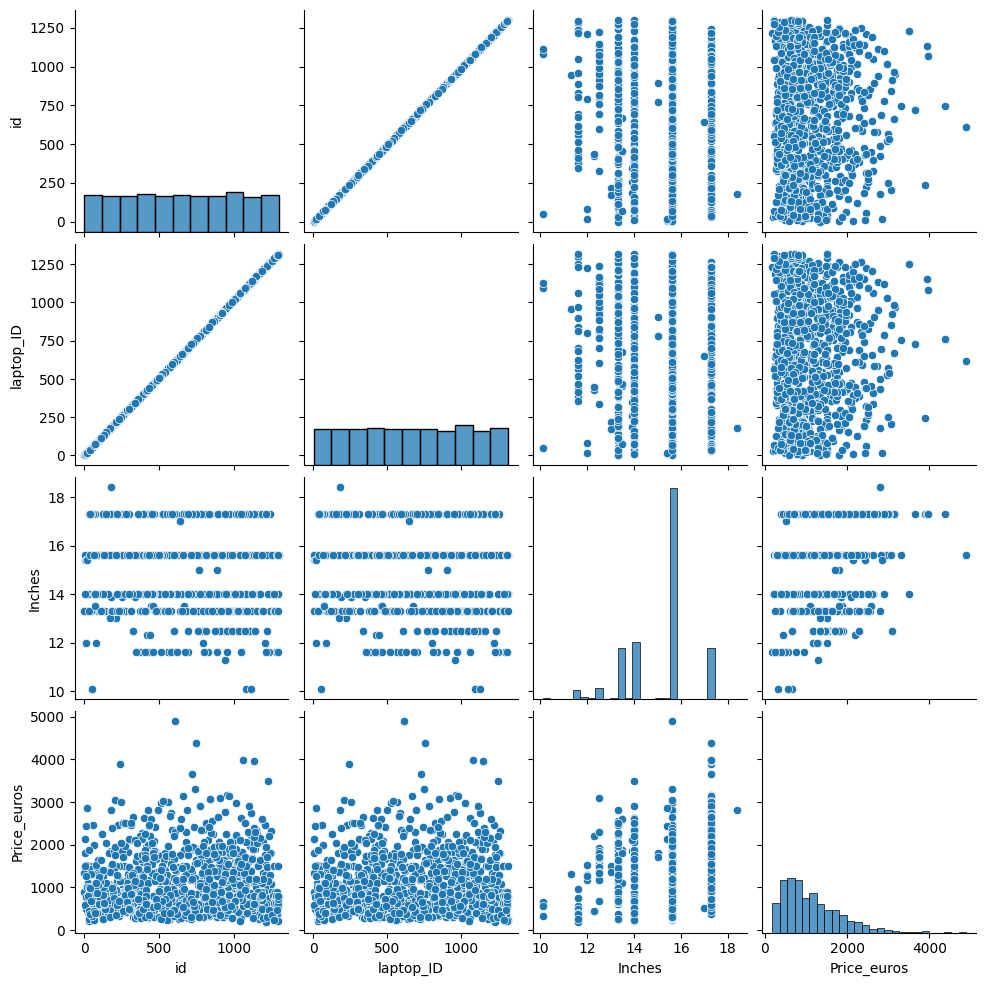

In [663]:
sns.pairplot(data)

<AxesSubplot:>

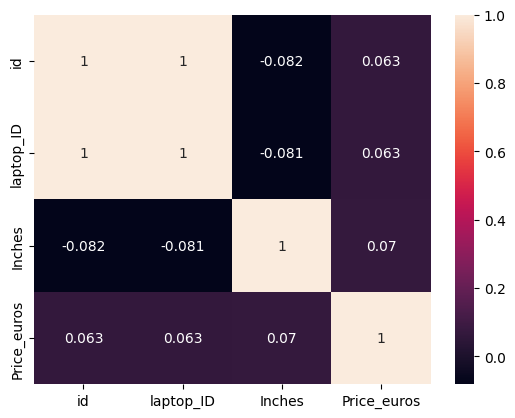

In [664]:
sns.heatmap(data.corr(),annot=True)

In [665]:
#Elimino las columnas de ID u Laptop_ID
data.drop(columns={"id","laptop_ID"},inplace=True)

In [666]:
#Vamos a crear una columna numérica para ordenar en función de la marca

len(data["Company"].unique())

19

In [667]:
data_groupby_company=data.groupby("Company")

In [668]:
counts = data_groupby_company.size()
counts

Company
Acer          76
Apple         17
Asus         110
Chuwi          1
Dell         218
Fujitsu        1
Google         1
HP           197
Huawei         2
LG             1
Lenovo       193
MSI           36
Mediacom       6
Microsoft      4
Razer          4
Samsung        5
Toshiba       37
Vero           1
Xiaomi         2
dtype: int64

In [669]:
marca_precio=data.groupby("Company")["Price_euros"].mean().sort_values()

In [670]:
marca_precio.index

Index(['Vero', 'Mediacom', 'Chuwi', 'Acer', 'Fujitsu', 'Lenovo', 'HP', 'Asus',
       'Dell', 'Xiaomi', 'Toshiba', 'Samsung', 'Huawei', 'Apple', 'MSI',
       'Microsoft', 'Google', 'LG', 'Razer'],
      dtype='object', name='Company')

In [671]:
marca_pos = {marca: pos+1 for pos, marca in enumerate(marca_precio.index)}

# Crear la columna en el DataFrame "data" con los valores correspondientes
data['marca_1_19'] = data['Company'].map(marca_pos)

In [672]:
#Lo mismo, con TypeName
data["TypeName"].unique()

array(['2 in 1 Convertible', 'Gaming', 'Notebook', 'Ultrabook', 'Netbook',
       'Workstation'], dtype=object)

In [673]:
typename_precio=data.groupby("TypeName")["Price_euros"].mean().sort_values()

In [674]:
typename_precio

TypeName
Netbook                630.641176
Notebook               788.099961
2 in 1 Convertible    1274.018810
Ultrabook             1559.773231
Gaming                1743.393077
Workstation           2330.798182
Name: Price_euros, dtype: float64

In [675]:
typename_pos = {typename: pos+1 for pos, typename in enumerate(typename_precio.index)}

data['typename_1_6'] = data['TypeName'].map(typename_pos)

<AxesSubplot:xlabel='Price_euros', ylabel='Inches'>

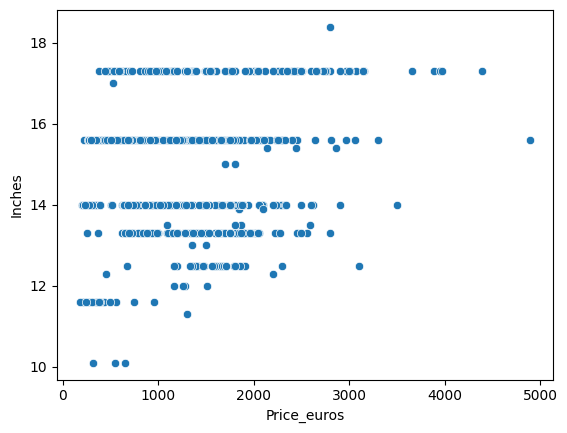

In [676]:
#Vamos a ver la correlación de "inches" respecto al precio
sns.scatterplot(data,x=data["Price_euros"],y=data["Inches"])
#No sé si se puede rascar algo de aquí


In [677]:
#Estudiamos la variable Screenresolution, únicamente tiene 37 valores distintos
data["ScreenResolution"].unique()
#Hago lo mismo que con la marca y el typename. Pero en este caso voy a separar el tamaño

array(['Full HD / Touchscreen 1920x1080', 'Full HD 1920x1080',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Full HD 2560x1440', 'IPS Panel 2560x1440', '1366x768',
       'IPS Panel Full HD / Touchscreen 1920x1080', 'IPS Panel 1366x768',
       'IPS Panel Quad HD+ 2560x1440', '1440x900',
       'IPS Panel Quad HD+ / Touchscreen 3200x1800',
       'IPS Panel Retina Display 2560x1600', '2560x1440',
       'IPS Panel Retina Display 2304x1440', 'Touchscreen 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       '4K Ultra HD 3840x2160', 'IPS Panel Retina Display 2736x1824',
       'IPS Panel Touchscreen 2560x1440', '1600x900',
       'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Touchscreen 1366x768', 'Touchscreen 2256x1504',
       'Quad HD+ 3200x1800',
       'IPS Panel Touchscreen / 4K Ultra HD 3840x2160', '1920x1080',
       'IPS Panel Retina Display 2880x1800',
       '

In [678]:
#screenresolution_precio=data.groupby("ScreenResolution")["Price_euros"].mean().sort_values()
#screenresolution_precio

In [679]:
#screenresolution_precio.index

In [680]:
#screenresolution_pos = {screenresolution: pos+1 for pos, screenresolution in enumerate(screenresolution_precio.index)}
#data['screenresolution_1_37'] = data['ScreenResolution'].map(screenresolution_pos)

In [681]:
import re

# Definir la expresión regular para buscar el tamaño de la pantalla
pattern = re.compile(r'\d{3,4}x\d{3,4}')

# Función para buscar la expresión regular en el texto
def extract_screen_size(text):
    size = re.findall(pattern, text)
    return size[0] if size else None

# Aplicar la función a la columna "Screen_Info" y guardar los resultados en una nueva columna "Screen_Size"
data['Screen_Size'] = data['ScreenResolution'].apply(extract_screen_size)

In [682]:
data["Screen_Size"].unique()

array(['1920x1080', '3200x1800', '2560x1440', '1366x768', '1440x900',
       '2560x1600', '2304x1440', '3840x2160', '2736x1824', '1600x900',
       '2256x1504', '2880x1800', '2160x1440', '1920x1200', '2400x1600'],
      dtype=object)

In [683]:
screensize_precio=data.groupby("Screen_Size")["Price_euros"].mean().sort_values()
screensize_precio

Screen_Size
1920x1200     444.817500
2736x1824     449.000000
1366x768      547.940938
1600x900      626.870000
1440x900      998.646667
1920x1080    1242.255129
2304x1440    1304.100000
2160x1440    1424.000000
3200x1800    1467.605000
2560x1600    1679.956667
2256x1504    1836.212500
2400x1600    2199.000000
2560x1440    2228.479333
3840x2160    2438.961034
2880x1800    2479.313333
Name: Price_euros, dtype: float64

In [684]:
screensize_precio.index

Index(['1920x1200', '2736x1824', '1366x768', '1600x900', '1440x900',
       '1920x1080', '2304x1440', '2160x1440', '3200x1800', '2560x1600',
       '2256x1504', '2400x1600', '2560x1440', '3840x2160', '2880x1800'],
      dtype='object', name='Screen_Size')

In [685]:
screensize_pos = {screensize: pos+1 for pos, screensize in enumerate(screensize_precio.index)}

data['screensize_1_15'] = data['Screen_Size'].map(screensize_pos)

In [686]:
data.head(1)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,marca_1_19,typename_1_6,Screen_Size,screensize_1_15
0,Asus,Chromebook Flip,2 in 1 Convertible,12.5,Full HD / Touchscreen 1920x1080,Intel Core M M3-6Y30 0.9GHz,4GB,64GB Flash Storage,Intel HD Graphics 515,Chrome OS,1.2kg,669.0,8,3,1920x1080,6


In [687]:
data["Screen_Info"] = data["ScreenResolution"].str.replace("1920x1080", "").str.replace("3200x1800", "").str.replace("2560x1440", "")\
    .str.replace("1366x768", "").str.replace("1440x900", "").str.replace("2560x1600", "").str.replace("2304x1440", "").str.replace("3840x2160", "").str.replace("2736x1824", "")\
        .str.replace("1600x900", "").str.replace("2256x1504", "").str.replace("2880x1800", "").str.replace("2160x1440", "").str.replace("1920x1200", "").str.replace("2400x1600", "").str.strip()


In [688]:
data[data["Screen_Info"]==""] #Hay 229 filas que no tienen valor en "Screen_Info". Vamos a darle un 0 a esas y ordenamos el resto

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,marca_1_19,typename_1_6,Screen_Size,screensize_1_15,Screen_Info
14,HP,250 G6,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,AMD Radeon 520,Windows 10,1.86kg,612.61,7,2,1366x768,3,
18,Lenovo,V110-15ISK (3855U/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core 3855U 1.6GHz,4GB,500GB HDD,Intel HD Graphics 510,Windows 10,2.1kg,318.00,6,2,1366x768,3,
19,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,Linux,2.25kg,359.00,9,2,1366x768,3,
21,Acer,Aspire 5,Notebook,15.6,1366x768,AMD A12-Series 9720P 2.7GHz,8GB,256GB SSD,AMD Radeon RX 540,Windows 10,2.2kg,659.00,4,2,1366x768,3,
22,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,1TB HDD,AMD Radeon R5 M430,No OS,1.9kg,368.00,6,2,1366x768,3,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,Lenovo,ThinkPad E570,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,2.3kg,565.00,6,2,1366x768,3,
899,Acer,Aspire E5-475,Notebook,14.0,1366x768,Intel Core i3 6006U 2GHz,8GB,1TB HDD,Intel HD Graphics 520,Windows 10,2.1kg,389.00,4,2,1366x768,3,
901,HP,15-ra044nv (N3060/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Windows 10,2.1kg,347.00,7,2,1366x768,3,
907,Dell,Vostro 3568,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,1TB HDD,AMD Radeon R5 M420,Windows 10,2.18kg,684.99,9,2,1366x768,3,


In [689]:
len(data["Screen_Info"].unique())

20

In [690]:
screeninfo_precio=data.groupby("Screen_Info")["Price_euros"].mean().sort_values()
screeninfo_precio
#Veo que las vacías ya están en el primer puesto así que no hace falta darles un 0, se quedan con el 1

Screen_Info
                                        575.771223
Quad HD+                               1011.000000
IPS Panel Touchscreen                  1082.387000
IPS Panel Full HD / Touchscreen        1164.467027
Full HD                                1170.687818
Touchscreen                            1182.718750
Touchscreen / Full HD                  1358.000000
IPS Panel Full HD                      1403.548389
Full HD / Touchscreen                  1421.304412
IPS Panel                              1471.665556
IPS Panel Quad HD+ / Touchscreen       1540.500000
IPS Panel Quad HD+                     1557.750000
Quad HD+ / Touchscreen                 1601.410000
IPS Panel Retina Display               1655.934286
Touchscreen / Quad HD+                 1869.000000
IPS Panel 4K Ultra HD / Touchscreen    2020.428571
IPS Panel Touchscreen / 4K Ultra HD    2250.680000
4K Ultra HD                            2253.233333
4K Ultra HD / Touchscreen              2393.570000
IPS Panel 4K Ultra 

In [691]:
screeninfo_precio.index

Index(['', 'Quad HD+', 'IPS Panel Touchscreen',
       'IPS Panel Full HD / Touchscreen', 'Full HD', 'Touchscreen',
       'Touchscreen / Full HD', 'IPS Panel Full HD', 'Full HD / Touchscreen',
       'IPS Panel', 'IPS Panel Quad HD+ / Touchscreen', 'IPS Panel Quad HD+',
       'Quad HD+ / Touchscreen', 'IPS Panel Retina Display',
       'Touchscreen / Quad HD+', 'IPS Panel 4K Ultra HD / Touchscreen',
       'IPS Panel Touchscreen / 4K Ultra HD', '4K Ultra HD',
       '4K Ultra HD / Touchscreen', 'IPS Panel 4K Ultra HD'],
      dtype='object', name='Screen_Info')

In [692]:
screeninfo_pos = {screeninfo: pos+1 for pos, screeninfo in enumerate(screeninfo_precio.index)}

data['screeninfo_1_20'] = data['Screen_Info'].map(screeninfo_pos)

In [693]:
data

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,marca_1_19,typename_1_6,Screen_Size,screensize_1_15,Screen_Info,screeninfo_1_20
0,Asus,Chromebook Flip,2 in 1 Convertible,12.5,Full HD / Touchscreen 1920x1080,Intel Core M M3-6Y30 0.9GHz,4GB,64GB Flash Storage,Intel HD Graphics 515,Chrome OS,1.2kg,669.00,8,3,1920x1080,6,Full HD / Touchscreen,9
1,Asus,Rog Strix,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1600 3.2GHz,8GB,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.2kg,1695.00,8,5,1920x1080,6,Full HD,5
2,Lenovo,V310-15IKB (i7-7500U/4GB/1TB/FHD/W10),Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4GB,1TB HDD,Intel HD Graphics 620,Windows 10,1.85kg,779.00,6,2,1920x1080,6,Full HD,5
3,Dell,XPS 13,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7660U 2.5GHz,16GB,512GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.29kg,2240.00,9,4,3200x1800,9,Quad HD+ / Touchscreen,13
4,Lenovo,B51-80 (i7-6500U/4GB/1008GB/FHD/W7),Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,1.0TB Hybrid,Intel HD Graphics 520,Windows 7,2.32kg,825.00,6,2,1920x1080,6,Full HD,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,Dell,Vostro 3568,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,1TB HDD,AMD Radeon R5 M420,Windows 10,2.18kg,684.99,9,2,1366x768,3,,1
908,Lenovo,IdeaPad 310-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A10-Series 9600P 2.4GHz,6GB,1TB HDD,AMD Radeon R5 430,Windows 10,2.4kg,499.00,6,2,1920x1080,6,Full HD,5
909,MSI,GL62M 7RD,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.2kg,1119.91,15,5,1920x1080,6,Full HD,5
910,Lenovo,110-15ACL (A6-7310/4GB/500GB/W10),Notebook,15.6,1366x768,AMD A6-Series 7310 2GHz,4GB,500GB HDD,AMD Radeon R4,Windows 10,2.19kg,298.00,6,2,1366x768,3,,1


In [694]:
data["Cpu"].sort_values()

908             AMD A10-Series 9600P 2.4GHz
118             AMD A10-Series 9620P 2.5GHz
684         AMD A10-Series A10-9620P 2.5GHz
21              AMD A12-Series 9720P 2.7GHz
871             AMD A12-Series 9720P 3.6GHz
                       ...                 
677    Intel Pentium Quad Core N4200 1.1GHz
336             Intel Xeon E3-1505M V6 3GHz
421             Intel Xeon E3-1505M V6 3GHz
716           Intel Xeon E3-1535M v5 2.9GHz
391           Intel Xeon E3-1535M v6 3.1GHz
Name: Cpu, Length: 912, dtype: object

In [695]:
data.iloc[:50,11:12].sum()

Price_euros    53340.72
dtype: float64

In [696]:
data.iloc[70:73,11:12]

,Price_euros
70,867.0
71,1049.9
72,1803.6


<AxesSubplot:>

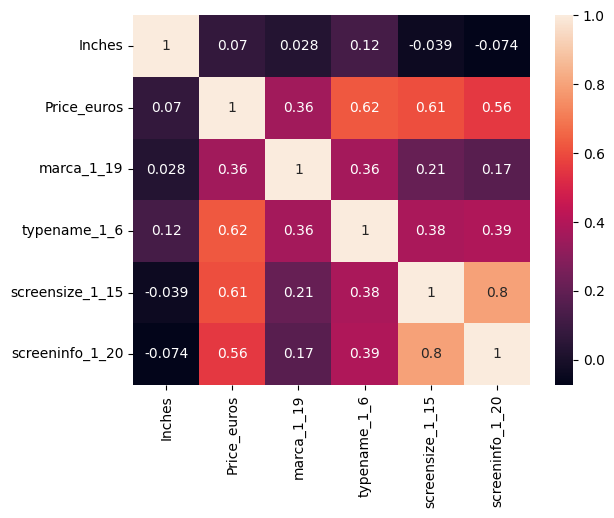

In [697]:
sns.heatmap(data.corr(),annot=True)

Sigo aquí

In [698]:
#Hago lo mismo con la RAM
len(data["Ram"].unique())

9

In [699]:
ram_precio=data.groupby("Ram")["Price_euros"].mean().sort_values()
ram_precio

Ram
2GB      249.660714
4GB      572.535827
6GB      622.920968
8GB     1194.254556
12GB    1264.548000
16GB    1966.281786
24GB    2968.000000
32GB    3090.605455
64GB    3975.000000
Name: Price_euros, dtype: float64

In [700]:
ram_pos = {ram_precio: pos+1 for pos, ram_precio in enumerate(ram_precio.index)}

data['ram_1_13'] = data['Ram'].map(ram_pos)

In [701]:
#Y con la Memory
len(data["Memory"].unique())

36

In [702]:
memory_precio=data.groupby("Memory")["Price_euros"].mean().sort_values()
memory_precio

Memory
32GB HDD                          265.000000
64GB SSD                          277.990000
32GB SSD                          284.833333
32GB Flash Storage                305.527778
16GB Flash Storage                307.180000
64GB Flash Storage                499.327000
2TB HDD                           589.930000
128GB HDD                         590.000000
500GB HDD                         617.516353
1TB HDD +  1TB HDD                621.450000
1TB HDD                           689.828902
128GB SSD                         709.121509
1.0TB Hybrid                      760.245000
128GB SSD +  2TB HDD              970.900000
128GB Flash Storage               998.970000
508GB Hybrid                     1002.000000
512GB Flash Storage              1222.000000
256GB SSD                        1246.946021
128GB SSD +  1TB HDD             1269.864308
256GB SSD +  256GB SSD           1288.500000
180GB SSD                        1364.000000
256GB SSD +  500GB HDD           1497.170000
512

In [703]:
memory_precio.index

Index(['32GB HDD', '64GB SSD', '32GB SSD', '32GB Flash Storage',
       '16GB Flash Storage', '64GB Flash Storage', '2TB HDD', '128GB HDD',
       '500GB HDD', '1TB HDD +  1TB HDD', '1TB HDD', '128GB SSD',
       '1.0TB Hybrid', '128GB SSD +  2TB HDD', '128GB Flash Storage',
       '508GB Hybrid', '512GB Flash Storage', '256GB SSD',
       '128GB SSD +  1TB HDD', '256GB SSD +  256GB SSD', '180GB SSD',
       '256GB SSD +  500GB HDD', '512GB SSD +  512GB SSD',
       '256GB Flash Storage', '256GB SSD +  2TB HDD', '512GB SSD +  256GB SSD',
       '512GB SSD', '512GB SSD +  2TB HDD', '256GB SSD +  1TB HDD',
       '64GB Flash Storage +  1TB HDD', '8GB SSD', '512GB SSD +  1TB HDD',
       '256GB SSD +  1.0TB Hybrid', '1TB SSD', '240GB SSD',
       '1TB SSD +  1TB HDD'],
      dtype='object', name='Memory')

In [704]:
memory_pos = {memory_precio: pos+1 for pos, memory_precio in enumerate(memory_precio.index)}

data['memory_1_36'] = data['Memory'].map(memory_pos)

In [705]:
#Lo mismo con OpSys
len(data["OpSys"].unique())


9

In [706]:
opsys_precio=data.groupby("OpSys")["Price_euros"].mean().sort_values()
opsys_precio

OpSys
Android          434.000000
Chrome OS        517.827778
No OS            581.135000
Linux            597.433913
Windows 10      1168.212416
Mac OS X        1273.328333
Windows 10 S    1524.568000
macOS           1731.731818
Windows 7       1779.338485
Name: Price_euros, dtype: float64

In [707]:
opsys_precio.index

Index(['Android', 'Chrome OS', 'No OS', 'Linux', 'Windows 10', 'Mac OS X',
       'Windows 10 S', 'macOS', 'Windows 7'],
      dtype='object', name='OpSys')

In [708]:

opsys_pos = {opsys_precio: pos+1 for pos, opsys_precio in enumerate(opsys_precio.index)}

data['opsys_1_9'] = data['OpSys'].map(opsys_pos)

seguimos

In [709]:
data["Weight"]=data["Weight"].str.replace("kg","")
data["Weight"]=data["Weight"].astype(float)

In [710]:
data["Ram"]=data["Ram"].str.replace("GB","")
data["Ram"]=data["Ram"].astype(float)

<AxesSubplot:>

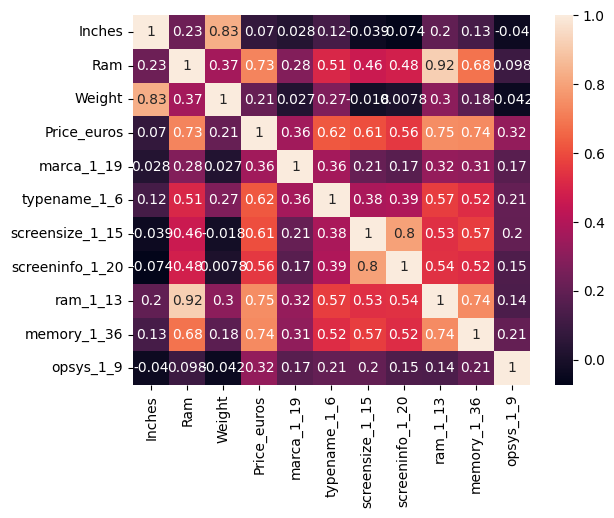

In [711]:
sns.heatmap(data.corr(),annot=True)

Sólo me falta CPU y GPU

In [712]:
precio=data["Price_euros"]

In [482]:
data.to_csv("data_sin_precio/data.csv",index=True)

In [483]:
data

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,Price_euros,marca_1_19,typename_1_6,Screen_Size,screensize_1_15,Screen_Info,screeninfo_1_20,ram_1_13,memory_1_36,opsys_1_9
0,Asus,Chromebook Flip,2 in 1 Convertible,12.5,Full HD / Touchscreen 1920x1080,Intel Core M M3-6Y30 0.9GHz,4.0,64GB Flash Storage,Intel HD Graphics 515,Chrome OS,...,669.00,8,3,1920x1080,6,Full HD / Touchscreen,9,2,6,2
1,Asus,Rog Strix,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1600 3.2GHz,8.0,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,...,1695.00,8,5,1920x1080,6,Full HD,5,4,29,5
2,Lenovo,V310-15IKB (i7-7500U/4GB/1TB/FHD/W10),Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4.0,1TB HDD,Intel HD Graphics 620,Windows 10,...,779.00,6,2,1920x1080,6,Full HD,5,2,11,5
3,Dell,XPS 13,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7660U 2.5GHz,16.0,512GB SSD,Intel Iris Plus Graphics 640,Windows 10,...,2240.00,9,4,3200x1800,9,Quad HD+ / Touchscreen,13,6,27,5
4,Lenovo,B51-80 (i7-6500U/4GB/1008GB/FHD/W7),Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,4.0,1.0TB Hybrid,Intel HD Graphics 520,Windows 7,...,825.00,6,2,1920x1080,6,Full HD,5,2,13,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,Dell,Vostro 3568,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4.0,1TB HDD,AMD Radeon R5 M420,Windows 10,...,684.99,9,2,1366x768,3,,1,2,11,5
908,Lenovo,IdeaPad 310-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A10-Series 9600P 2.4GHz,6.0,1TB HDD,AMD Radeon R5 430,Windows 10,...,499.00,6,2,1920x1080,6,Full HD,5,3,11,5
909,MSI,GL62M 7RD,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8.0,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,...,1119.91,15,5,1920x1080,6,Full HD,5,4,19,5
910,Lenovo,110-15ACL (A6-7310/4GB/500GB/W10),Notebook,15.6,1366x768,AMD A6-Series 7310 2GHz,4.0,500GB HDD,AMD Radeon R4,Windows 10,...,298.00,6,2,1366x768,3,,1,2,9,5


In [713]:
data=pd.read_csv("data_sin_precio/data_defi.csv",sep=";")

In [714]:
data222=pd.read_csv("train.csv")

In [715]:
data["Weight"]=data222["Weight"]

In [716]:
data["Weight"]

0       1.2kg
1       3.2kg
2      1.85kg
3      1.29kg
4      2.32kg
        ...  
907    2.18kg
908     2.4kg
909     2.2kg
910    2.19kg
911     2.5kg
Name: Weight, Length: 912, dtype: object

In [717]:
data["Weight"]=data["Weight"].str.replace("kg","")
data["Weight"]=data["Weight"].astype(float)

In [718]:
data["Precio"]=precio

In [719]:
#Cpu2
data["Cpu2"].unique()

array(['Intel', 'AMD'], dtype=object)

In [720]:
procesador_marca_precio=data.groupby("Cpu2")["Precio"].mean().sort_values()
procesador_marca_precio

Cpu2
AMD       549.765652
Intel    1157.577517
Name: Precio, dtype: float64

In [721]:
procesador_marca_pos = {procesador_marca: pos+1 for pos, procesador_marca in enumerate(procesador_marca_precio.index)}

data['procesador_marca_1_2'] = data['Cpu2'].map(procesador_marca_pos)

In [722]:
#Cpu3
len(data["Cpu3"].unique())

13

In [723]:
procesador_modelo_precio=data.groupby("Cpu3")["Precio"].mean().sort_values()
procesador_modelo_precio

Cpu3
E-Series       300.141429
Celeron        314.861864
Atom           356.295714
A4-Series      379.000000
A6-Series      391.112857
Pentium        432.247895
A8-Series      448.500000
A9-Series      489.924667
A10-Series     551.000000
A12-Series     680.428333
Core          1234.031532
Ryzen         1731.000000
Xeon          3584.000000
Name: Precio, dtype: float64

In [724]:
procesador_modelo_pos = {procesador_modelo: pos+1 for pos, procesador_modelo in enumerate(procesador_modelo_precio.index)}

data['procesador_modelo_1_13'] = data['Cpu3'].map(procesador_modelo_pos)

In [725]:
#Cpu7
data["Cpu7"].unique()

array(['0.9GHz', '3.2GHz', '2.7GHz', '2.5GHz', '1.1GHz', '2.8GHz',
       '2.9GHz', '2.4GHz', '3GHz', '1.8GHz', '1.6GHz', '2.0GHz', '2GHz',
       '1.5GHz', '2.3GHz', '3.6GHz', '2.6GHz', '2.70GHz', '3.1GHz',
       '1.2GHz', '2.1GHz', '1.3GHz', '1.44GHz', '1.9GHz', '2.2GHz',
       '2.50GHz', '1.92GHz'], dtype=object)

In [726]:
data["Cpu7"] = data["Cpu7"].replace("2GHz", "2.0GHz")
data["Cpu7"] = data["Cpu7"].replace("2.5GHz", "2.50GHz")

In [727]:
procesador_rendimiento_precio=data.groupby("Cpu7")["Precio"].mean().sort_values()
procesador_rendimiento_precio

Cpu7
1.92GHz     265.000000
1.5GHz      325.831667
1.1GHz      364.096471
1.44GHz     371.511667
2.1GHz      498.500000
2.0GHz      498.573043
2.2GHz      600.885556
1.6GHz      672.450588
3.6GHz      684.714000
0.9GHz      709.000000
2.4GHz      834.843000
3GHz        899.743125
2.70GHz     979.000000
2.3GHz     1025.096545
2.50GHz    1029.920235
1.8GHz     1234.631600
2.7GHz     1362.214299
1.9GHz     1452.980000
1.2GHz     1603.116667
2.6GHz     1663.963400
3.2GHz     1695.000000
2.8GHz     1781.702750
1.3GHz     1854.020000
2.9GHz     2149.625294
3.1GHz     2914.200000
Name: Precio, dtype: float64

In [728]:
procesador_rendimiento_pos = {procesador_rendimiento: pos+1 for pos, procesador_rendimiento in enumerate(procesador_rendimiento_precio.index)}

data['procesador_rendimiento_1_25'] = data['Cpu7'].map(procesador_rendimiento_pos)

In [729]:
#Gpu2
len(data["Gpu2"].unique())

3

In [730]:
gpu_marca_precio=data.groupby("Gpu2")["Precio"].mean().sort_values()
gpu_marca_precio


Gpu2
AMD       1081.411818
Intel     1119.264920
Nvidia    1161.741348
Name: Precio, dtype: float64

In [731]:
gpu_marca_pos = {gpu_marca_precio: pos+1 for pos, gpu_marca_precio in enumerate(gpu_marca_precio.index)}

data['gpu_marca_1_3'] = data['Gpu2'].map(gpu_marca_pos)

In [732]:
#Gpu3
len(data["Gpu3"].unique())



10

In [733]:
gpu_modelo_precio=data.groupby("Gpu3")["Precio"].mean().sort_values()
gpu_modelo_precio

Gpu3
R17M-M1-70     659.000000
Iris          1063.295385
Radeon        1067.026457
UHD           1079.081064
HD            1122.080686
GeForce       1148.543113
Quadro        1290.020000
GTX           1475.000000
FirePro       1643.750000
Graphics      2505.020000
Name: Precio, dtype: float64

In [734]:
gpu_modelo_pos = {gpu_modelo_precio: pos+1 for pos, gpu_modelo_precio in enumerate(gpu_modelo_precio.index)}

data['gpu_modelo_1_10'] = data['Gpu3'].map(gpu_modelo_pos)

<AxesSubplot:>

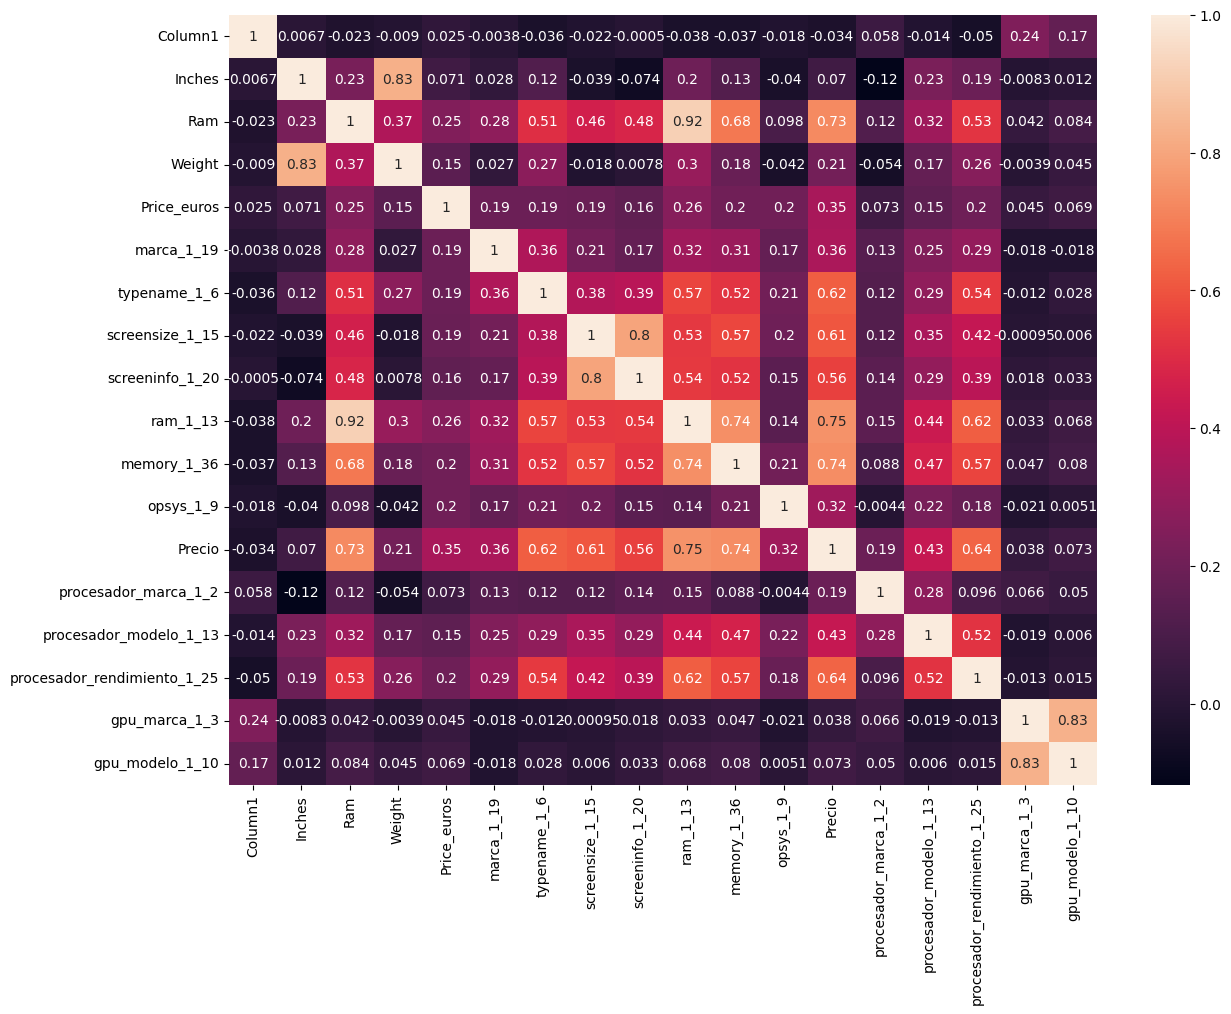

In [735]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(),annot=True)

ciénaga


In [ ]:
'''Ideas:
    ID: No creo que sea importante
    Laptop ID: Tampoco creo que sea importante
    Company: Seguramente sí sea importante, hay que pensar una forma de ver la correlación
    Product: No creo que sea importante
    TypeName: Lo mismo que Company, seguramente se podrá sacar algo
    Inches: Estuadiarlo tal cual
    Screen/Resolution: Quizá dividir en 2 features (tamaño | Full HD)
    CPU: Sacar el i (ej: i7), el U (ej: 7200U) y los GHz (ej: 2.4GHz) y con el resto... no sé
    RAM: Habrá que convertirla en float
    Memoria: Sacar los GB o Tb por separado y ver si se puede hacer algo con el resto (HDD, SDD, Flash, Hybrid...). OJO! Algunas tienen más de 1 (como la de la fila 1,909 o 911)
    GPU: A ver qué son las siglas (GTX, R5...). Ver si los números tienen alguna relación...
    OpSys: Cuántos tipos habrá? Seguramente no muchos.
    Weight habrá que pasarlo a float
    Price: Es el objetivo
    
    Quizá variables dummy? Sería una variable en la que incluye un 1 si existe esa característica y un 0 sino... Puede que me sirva

In [ ]:
'''podemos dar valores tipo 1,2,3 según los gigas siempre de mayor a menor. Es decir, que el 32GB valga 3, 16GB valga 2, 8GB valga 1 
o, por ejemplo, con la marca: si sabemos que una es más cara le ponemos el valor mayor. Y a la más barata, el menor (1)

Pasar Tb a Gb (para no tener 2 escalas)

Puedo usar boxplot para ver la media de los pc gaming y darle una ponderación respecto a otro pc

In [ ]:
'''Herramientas para crear y modificar variables
np.where
replace
regex (más tedioso)

get_dummies
str.contains
str.startswith

In [ ]:
'''Los mejores modelos pueden ser los de Ensembles

Linear Regression

In [736]:
data.columns

Index(['Column1', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros', 'marca_1_19', 'typename_1_6', 'Screen_Size',
       'screensize_1_15', 'Screen_Info', 'screeninfo_1_20', 'ram_1_13',
       'memory_1_36', 'opsys_1_9', 'Cpu2', 'Cpu3', 'Cpu4', 'Cpu5', 'Cpu6',
       'Cpu7', 'Gpu2', 'Gpu3', 'Gpu4', 'Gpu5', 'Unnamed: 32', 'Precio',
       'procesador_marca_1_2', 'procesador_modelo_1_13',
       'procesador_rendimiento_1_25', 'gpu_marca_1_3', 'gpu_modelo_1_10'],
      dtype='object')

In [737]:
X=data.copy()
X.drop(columns={"Column1","Company","Product","TypeName","ScreenResolution","Cpu","Memory","Gpu","OpSys","Price_euros",\
    "Screen_Size","Screen_Info","Cpu2","Cpu3","Cpu4","Cpu5","Cpu6","Cpu7","Gpu2","Gpu3","Gpu4","Gpu5","Unnamed: 32","Precio","Ram"},inplace=True)
Y=data["Precio"]

In [738]:
X['id'] = range(1, 913)

In [739]:
indice_id = X.columns.get_loc("id")

# mover la columna "id" al primer lugar
columnas = X.columns.tolist()
columnas = [columnas[indice_id]] + columnas[:indice_id] + columnas[indice_id+1:]
X = X[columnas]

In [740]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [741]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(729, 15)
(183, 15)
(729,)
(183,)


In [742]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(X_train,Y_train)
print(linear_model.intercept_,linear_model.coef_)

-746.338431603851 [ 2.66768524e-02 -7.98060508e+00  1.90781653e+02  8.25290820e+00
  7.09862873e+01  6.14345078e+01 -4.98677055e+00  1.11552959e+02
  2.52361569e+01  1.00555580e+02  2.64255128e+02 -1.08365942e+01
  2.02622939e+01  3.93199760e+01 -8.44703625e+00]


In [743]:
linear_model.score(X_train,Y_train)

0.747775741523229

In [744]:
predictions_lm_train=linear_model.predict(X_train)
predictions_lm_test=linear_model.predict(X_test)

#Vemos las métricas de los errores
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score
print("Training Errors:")
print("MAE:",mean_absolute_error(Y_train,predictions_lm_train))  
print("MSE:",mean_squared_error(Y_train,predictions_lm_train))
print("R2:",r2_score(Y_train,predictions_lm_train))  #Cómo de bien se ajusta el modelo a los datos de entrenamiento utilizados
print("MAPE:",mean_absolute_percentage_error(Y_train,predictions_lm_train))
print("-"*20)
print("Test Errors:")
print("MAE:",mean_absolute_error(Y_test,predictions_lm_test))
print("R2:",r2_score(Y_test,predictions_lm_test)) 
print("MSE:",mean_squared_error(Y_test,predictions_lm_test))
print("MAPE:",mean_absolute_percentage_error(Y_test,predictions_lm_test))

Training Errors:
MAE: 250.73321735953837
MSE: 124202.8316107506
R2: 0.747775741523229
MAPE: 0.25279407927551467
--------------------
Test Errors:
MAE: 275.02212731123484
R2: 0.7227121692161391
MSE: 124620.2285176755
MAPE: 0.2867466890962127


In [745]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test) #Usamos el scaler que hemos entrenado con el X_train



In [746]:
linear_model_scaled=LinearRegression()
linear_model_scaled.fit(X_train_scaled,Y_train)

#Sacamos los valores para la nueva fórmula del modelo generado con la data escalada
print(linear_model_scaled.intercept_,linear_model_scaled.coef_)



1134.1372565157753 [   7.09692828 -110.44458148  124.49221673   21.79527277   91.16233943
  148.29276948  -18.71375556  163.76073729  178.64179906  109.46235953
   57.25504541  -27.52867082  110.93196386   25.81272166   -9.47853388]


In [747]:
#Metemos los coeficientes en un Dataframe para ver el peso de cada uno
intercept_scal = linear_model_scaled.intercept_
features_std = pd.DataFrame(abs(linear_model_scaled.coef_).T, X_train.columns, columns=['coefficient'])
features_std.sort_values('coefficient', ascending=False)



,coefficient
memory_1_36,178.641799
ram_1_13,163.760737
screensize_1_15,148.292769
Weight,124.492217
procesador_rendimiento_1_25,110.931964
Inches,110.444581
opsys_1_9,109.462360
typename_1_6,91.162339
procesador_marca_1_2,57.255045
procesador_modelo_1_13,27.528671


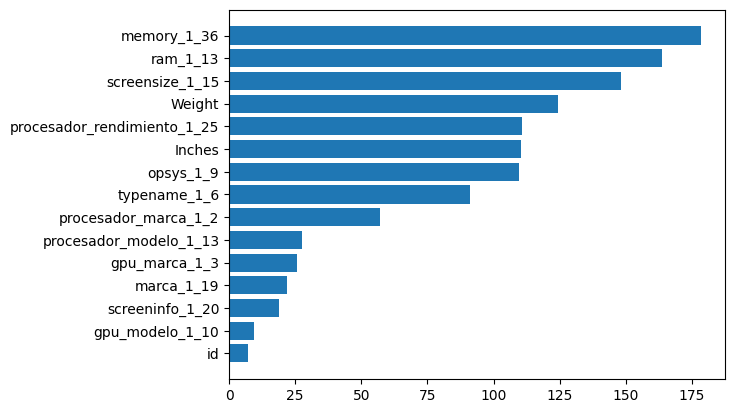

In [748]:
#Podemos verlo gráficamente
import matplotlib.pyplot as plt
features_std = features_std.sort_values('coefficient', ascending=True)
plt.barh(features_std.index, features_std.coefficient);

In [749]:
Z_test=pd.read_csv("test_defi.csv",sep=";")

In [750]:
dict_marca={'Vero':1, 'Mediacom':2, 'Chuwi':3, 'Acer':4, 'Fujitsu':5, 'Lenovo':6, 'HP':7, 'Asus':8,
       'Dell':9, 'Xiaomi':10, 'Toshiba':11, 'Samsung':12, 'Huawei':13, 'Apple':14, 'MSI':15,
       'Microsoft':16, 'Google':17, 'LG':18, 'Razer':19}
Z_test["marca_1_19"] = Z_test["Company"].map(dict_marca)

In [751]:
dict_typename={'Netbook':1, 'Notebook':2, '2 in 1 Convertible':3, 'Ultrabook':4, 'Gaming':5,
       'Workstation':6}
Z_test["typename_1_6"] = Z_test["TypeName"].map(dict_typename)

In [752]:
# Definir la expresión regular para buscar el tamaño de la pantalla
pattern = re.compile(r'\d{3,4}x\d{3,4}')

# Función para buscar la expresión regular en el texto
def extract_screen_size(text):
    size = re.findall(pattern, text)
    return size[0] if size else None

# Aplicar la función a la columna "Screen_Info" y guardar los resultados en una nueva columna "Screen_Size"
Z_test['Screen_Size'] = Z_test['ScreenResolution'].apply(extract_screen_size)

In [753]:
dict_screensize={'1920x1200':1, '2736x1824':2, '1366x768':3, '1600x900':4, '1440x900':5,
       '1920x1080':6, '2304x1440':7, '2160x1440':8, '3200x1800':9, '2560x1600':10,
       '2256x1504':11, '2400x1600':12, '2560x1440':13, '3840x2160':14, '2880x1800':15}

In [754]:
Z_test["screensize_1_15"] = Z_test["Screen_Size"].map(dict_screensize)

In [755]:
Z_test["Screen_Info"] = Z_test["ScreenResolution"].str.replace("1920x1080", "").str.replace("3200x1800", "").str.replace("2560x1440", "")\
    .str.replace("1366x768", "").str.replace("1440x900", "").str.replace("2560x1600", "").str.replace("2304x1440", "").str.replace("3840x2160", "").str.replace("2736x1824", "")\
        .str.replace("1600x900", "").str.replace("2256x1504", "").str.replace("2880x1800", "").str.replace("2160x1440", "").str.replace("1920x1200", "").str.replace("2400x1600", "").str.strip()


In [756]:
dict_screeninfo={'':1, 'Quad HD+':2, 'IPS Panel Touchscreen':3,
       'IPS Panel Full HD / Touchscreen':4, 'Full HD':5, 'Touchscreen':6,
       'Touchscreen / Full HD':7, 'IPS Panel Full HD':8, 'Full HD / Touchscreen':9,
       'IPS Panel':10, 'IPS Panel Quad HD+ / Touchscreen':11, 'IPS Panel Quad HD+':12,
       'Quad HD+ / Touchscreen':13, 'IPS Panel Retina Display':14,
       'Touchscreen / Quad HD+':15, 'IPS Panel 4K Ultra HD / Touchscreen':16,
       'IPS Panel Touchscreen / 4K Ultra HD':17, '4K Ultra HD':18,
       '4K Ultra HD / Touchscreen':19, 'IPS Panel 4K Ultra HD':20}

In [757]:

Z_test['screeninfo_1_20'] = Z_test['Screen_Info'].map(screeninfo_pos)

In [758]:
dict_ram={"2GB":1,"4GB":2,"6GB":3,"8GB":4,"12GB":5,"16GB":6,"24GB":7,"32GB":8,"64GB":9}
Z_test["ram_1_13"] = Z_test["Ram"].map(dict_ram)

In [759]:
dict_memory={'32GB HDD':1, '64GB SSD':2, '32GB SSD':3, '32GB Flash Storage':4,
       '16GB Flash Storage':5, '64GB Flash Storage':6, '2TB HDD':7, '128GB HDD':8,
       '500GB HDD':9, '1TB HDD +  1TB HDD':10, '1TB HDD':11, '128GB SSD':12,
       '1.0TB Hybrid':13, '128GB SSD +  2TB HDD':14, '128GB Flash Storage':15,
       '508GB Hybrid':16, '512GB Flash Storage':17, '256GB SSD':18,
       '128GB SSD +  1TB HDD':19, '256GB SSD +  256GB SSD':20, '180GB SSD':21,
       '256GB SSD +  500GB HDD':22, '512GB SSD +  512GB SSD':23,
       '256GB Flash Storage':24, '256GB SSD +  2TB HDD':25, '512GB SSD +  256GB SSD':26,
       '512GB SSD':27, '512GB SSD +  2TB HDD':28, '256GB SSD +  1TB HDD':29,
       '64GB Flash Storage +  1TB HDD':30, '8GB SSD':31, '512GB SSD +  1TB HDD':32,
       '256GB SSD +  1.0TB Hybrid':33, '1TB SSD':34, '240GB SSD':35,
       '1TB SSD +  1TB HDD':36}
Z_test["memory_1_36"] = Z_test["Memory"].map(dict_memory)

In [760]:
dict_opsys={'Android':1, 'Chrome OS':2, "No OS":3, 'Linux':4, 'Windows 10':5, 'Mac OS X':6,
       'Windows 10 S':7, 'macOS':8, 'Windows 7':9}
Z_test["opsys_1_9"] = Z_test["OpSys"].map(dict_opsys)

In [761]:
dict_proc_marca={"AMD":1,"Intel":2}
Z_test["procesador_marca_1_2"] = Z_test["Cpu2"].map(dict_proc_marca)

In [256]:
'''def get_procmarca(text):
    regex = re.compile('|'.join(dict_proc_marca.keys()))
    matches = regex.findall(text)
    if matches:
        match = matches[0]
        return dict_proc_marca[match]
    else:
        return None

# Crear la nueva columna con el valor del diccionario correspondiente
Z_test['procesador_marca_1_2'] = Z_test['Cpu'].apply(get_procmarca)

In [762]:
dict_proc_mod={"E-Series":1,"Celeron":2,"Atom":3,"A4-Series":4,"A6-Series":5,"Pentium":6,"A8-Series":7,"A9-Series":8,"A10-Series":9,"A12-Series":10,"Core":11,"Ryzen":12,"Xeon":13}
Z_test["procesador_modelo_1_13"] = Z_test["Cpu3"].map(dict_proc_mod)

In [259]:
'''def get_procmod(text):
    regex = re.compile('|'.join(dict_proc_mod.keys()))
    matches = regex.findall(text)
    if matches:
        match = matches[0]
        return dict_proc_mod[match]
    else:
        return None

# Crear la nueva columna con el valor del diccionario correspondiente
Z_test['procesador_modelo_1_13'] = Z_test['Cpu'].apply(get_procmod)

In [763]:
dict_proc_rend={"1.92GHz":1,"1.5GHz":2,"1.1GHz":3,"1.44GHz":4,"2GHz":5,"2.1GHz":6,"2.0GHz":7,"2.2GHz":8,"1.6GHz":9,"3.6GHz":10,"0.9GHz":11,"2.4GHz":12,"3GHz":13,"2.70GHz":14,"2.5GHz":15,"2.3GHz":16,"1.8GHz":17,"2.7GHz":18,"1.9GHz":19,"2.50GHz":20,"1.2GHz":21,"2.6GHz":22,"3.2GHz":23,"2.8GHz":24,"1.3GHz":25,"2.9GHz":26,"3.1GHz":27}
Z_test["procesador_rendimiento_1_25"] = Z_test["Cpu7"].map(dict_proc_rend)

In [267]:
'''def get_procrend(text):
    regex = re.compile('|'.join(dict_proc_rend.keys()))
    matches = regex.findall(text)
    if matches:
        match = matches[0]
        return dict_proc_rend[match]
    else:
        return None

# Crear la nueva columna con el valor del diccionario correspondiente
Z_test['procesador_rendimiento_1_25'] = Z_test['Cpu'].apply(get_procrend)

In [764]:
dict_gpu_marca={"AMD":1,"Intel":2,"Nvidia":3}
Z_test["gpu_marca_1_3"] = Z_test["Gpu2"].map(dict_gpu_marca)

In [269]:
'''def get_gpu_marca(text):
    regex = re.compile('|'.join(dict_gpu_marca.keys()))
    matches = regex.findall(text)
    if matches:
        match = matches[0]
        return dict_gpu_marca[match]
    else:
        return None

# Crear la nueva columna con el valor del diccionario correspondiente
Z_test['gpu_marca_1_3'] = Z_test['Gpu'].apply(get_gpu_marca)

In [765]:
dict_gpu_modelo={"R17M-M1-70":1,"Iris":2,"Radeon":3,"UHD":4,"HD":5,"GeForce":6,"Quadro":7,"GTX":8,"FirePro":9,"Graphics":10}
Z_test["gpu_modelo_1_10"] = Z_test["Gpu3"].map(dict_gpu_modelo)

In [271]:
'''def get_gpu_modelo(text):
    regex = re.compile('|'.join(dict_gpu_modelo.keys()))
    matches = regex.findall(text)
    if matches:
        match = matches[0]
        return dict_gpu_modelo[match]
    else:
        return None

# Crear la nueva columna con el valor del diccionario correspondiente
Z_test['gpu_modelo_1_10'] = Z_test['Gpu'].apply(get_gpu_modelo)

In [766]:
Z_test["Weight"]=Z_test["Weight"].str.replace("kg","")
Z_test["Weight"]=Z_test["Weight"].astype(float)

In [767]:
Z_test.head(1)

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,...,Screen_Info,screeninfo_1_20,ram_1_13,memory_1_36,opsys_1_9,procesador_marca_1_2,procesador_modelo_1_13,procesador_rendimiento_1_25,gpu_marca_1_3,gpu_modelo_1_10
0,824,833,Lenovo,ThinkPad X1,Ultrabook,140,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB Flash Storage,...,IPS Panel Full HD,8.0,4,24.0,5,2.0,11.0,11.0,2.0,5.0


In [768]:
X.head(1)

,id,Inches,Weight,marca_1_19,typename_1_6,screensize_1_15,screeninfo_1_20,ram_1_13,memory_1_36,opsys_1_9,procesador_marca_1_2,procesador_modelo_1_13,procesador_rendimiento_1_25,gpu_marca_1_3,gpu_modelo_1_10
0,1,125,1.2,8,3,6,9,2,6,2,2,11,10,2,5


In [769]:
Z_test.columns

Index(['id', 'laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Cpu2', 'Cpu3', 'Cpu4', 'Cpu5', 'Cpu6', 'Cpu7', 'Gpu2', 'Gpu3', 'Gpu4',
       'Gpu5', 'Unnamed: 23', 'marca_1_19', 'typename_1_6', 'Screen_Size',
       'screensize_1_15', 'Screen_Info', 'screeninfo_1_20', 'ram_1_13',
       'memory_1_36', 'opsys_1_9', 'procesador_marca_1_2',
       'procesador_modelo_1_13', 'procesador_rendimiento_1_25',
       'gpu_marca_1_3', 'gpu_modelo_1_10'],
      dtype='object')

In [770]:

Z_test.drop(columns={"laptop_ID","Company","Product","TypeName","ScreenResolution","Cpu","Memory","Gpu","OpSys",\
    "Screen_Size","Screen_Info","Cpu2","Cpu3","Cpu4","Cpu5","Cpu6","Cpu7","Gpu2","Gpu3","Gpu4","Gpu5","Unnamed: 23","Ram"},inplace=True)

Llenamos los Nan

In [771]:
Z_test["screeninfo_1_20"].fillna(5, inplace=True)

In [772]:
Z_test["memory_1_36"].fillna(15, inplace=True)

In [773]:
Z_test["procesador_marca_1_2"].fillna(1, inplace=True)

In [774]:
Z_test["procesador_modelo_1_13"].fillna(6, inplace=True)

In [775]:
Z_test["procesador_rendimiento_1_25"].fillna(13, inplace=True)

In [776]:
Z_test["gpu_marca_1_3"].fillna(2, inplace=True)

In [777]:
Z_test["gpu_modelo_1_10"].fillna(5, inplace=True)

Repaso

In [778]:
Z_test.columns

Index(['id', 'Inches', 'Weight', 'marca_1_19', 'typename_1_6',
       'screensize_1_15', 'screeninfo_1_20', 'ram_1_13', 'memory_1_36',
       'opsys_1_9', 'procesador_marca_1_2', 'procesador_modelo_1_13',
       'procesador_rendimiento_1_25', 'gpu_marca_1_3', 'gpu_modelo_1_10'],
      dtype='object')

In [779]:
Z_test["gpu_modelo_1_10"][Z_test["gpu_modelo_1_10"].isna()]

Series([], Name: gpu_modelo_1_10, dtype: float64)

In [780]:
Z_test[Z_test["screeninfo_1_20"].isna()]

,id,Inches,Weight,marca_1_19,typename_1_6,screensize_1_15,screeninfo_1_20,ram_1_13,memory_1_36,opsys_1_9,procesador_marca_1_2,procesador_modelo_1_13,procesador_rendimiento_1_25,gpu_marca_1_3,gpu_modelo_1_10


In [782]:
predictions_linear_model=linear_model.predict(Z_test)

In [783]:
predictions_linear_model

array([1259.37256022,  595.14477598, 1762.11271011, 1130.00638508,
       1135.85260827, 2343.66612434,  269.75635532, 1301.89012017,
       1942.12555909, 1816.7931409 ,  946.5905726 , 1750.34822587,
        679.50753352, 1791.68973198, 1894.59967021, 1572.13331108,
        325.3585724 , 1092.44571621,  107.81585311,  191.76333297,
       1348.67282102, 1015.15611607,  338.79919448,  358.97920713,
        448.14055074, 1716.61443162, 1640.30114149, 1324.94293462,
       1534.11111471, 1341.12042794,  967.00965009, 1082.78998782,
       1575.88715451, 2063.11875198, 1363.41974001,  577.39569573,
       2027.59206684,  894.37472253,  916.43841987,  310.48663726,
       1759.4306783 , 1046.20713452, 2113.57652826, 1240.66964581,
       1521.29421886, 1948.48686027, 1379.31118626, 1516.65159   ,
       1196.45990164,  954.93529045, 1316.51615907, 2071.01396907,
       1185.87643331, 1278.22638691, 1649.72169265, 1143.98794221,
       1422.040162  , 1170.28574578, 1189.93883035,  687.95451

In [784]:
import pandas as pd
import numpy as np

# asumimos que Z_test y predicciones ya están cargados

# crear un diccionario con las columnas "id" y "predicciones"
diccionario = {'id': Z_test['id'], 'Price_euros': np.array(predictions_linear_model)}

# crear el DataFrame "entrega"
entrega_linear_model2 = pd.DataFrame(diccionario)

# imprimir el DataFrame "entrega"
entrega_linear_model2

,id,Price_euros
0,824,1259.372560
1,101,595.144776
2,1157,1762.112710
3,940,1130.006385
4,853,1135.852608
...,...,...
386,292,842.907368
387,688,849.069278
388,910,1361.073488
389,54,453.859336


In [785]:
entrega_linear_model.to_csv("entrega_linear_model2.csv",index=False)

In [805]:
X.to_csv("X_definitiva.csv",index=False)

In [804]:
Y.to_csv("Y_definitiva.csv",index=False)

In [ ]:
Z_test.to_csv("Z_test_definitiva.csv",index=False)